In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

WITHOUT OUTLIER:
  Intercept: -74.6071
  Slope: 0.8357
  R²: 0.9948

WITH OUTLIER:
  Intercept: -6.3133
  Slope: 0.4115
  R²: 0.4216

IMPACT OF OUTLIER:
  Slope decreased by: 0.4242
  R² decreased by: 0.5732
  The outlier significantly reduces the slope and R², indicating poor model fit


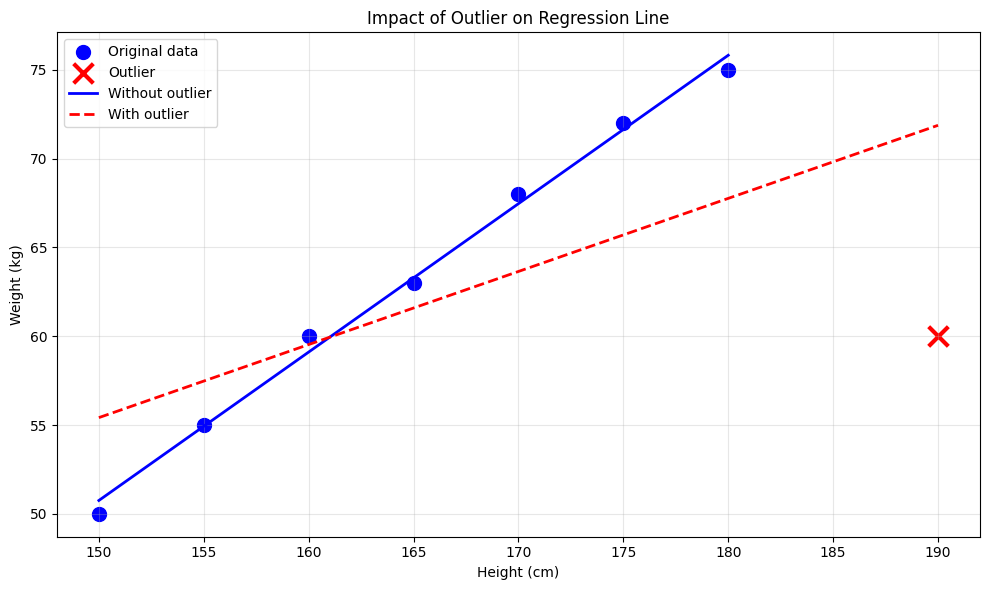

In [4]:
dataOriginal = {
    'Height': [150, 155, 160, 165, 170, 175, 180],
    'Weight': [50, 55, 60, 63, 68, 72, 75]
}
dfOriginal = pd.DataFrame(dataOriginal)
dataWithOutlier = {
    'Height': [150, 155, 160, 165, 170, 175, 180, 190],
    'Weight': [50, 55, 60, 63, 68, 72, 75, 60]
}
dfWithOutlier = pd.DataFrame(dataWithOutlier)
XOriginal = dfOriginal[['Height']]
YOriginal = dfOriginal['Weight']
XWithOutlier = dfWithOutlier[['Height']]
YWithOutlier = dfWithOutlier['Weight']
modelOriginal = LinearRegression()
modelOriginal.fit(XOriginal, YOriginal)
modelWithOutlier = LinearRegression()
modelWithOutlier.fit(XWithOutlier, YWithOutlier)
print("WITHOUT OUTLIER:")
print(f"  Intercept: {modelOriginal.intercept_:.4f}")
print(f"  Slope: {modelOriginal.coef_[0]:.4f}")
print(f"  R²: {modelOriginal.score(XOriginal, YOriginal):.4f}")
print("\nWITH OUTLIER:")
print(f"  Intercept: {modelWithOutlier.intercept_:.4f}")
print(f"  Slope: {modelWithOutlier.coef_[0]:.4f}")
print(f"  R²: {modelWithOutlier.score(XWithOutlier, YWithOutlier):.4f}")
print("\nIMPACT OF OUTLIER:")
print(f"  Slope decreased by: {modelOriginal.coef_[0] - modelWithOutlier.coef_[0]:.4f}")
print(f"  R² decreased by: {modelOriginal.score(XOriginal, YOriginal) - modelWithOutlier.score(XWithOutlier, YWithOutlier):.4f}")
print("  The outlier significantly reduces the slope and R², indicating poor model fit")
plt.figure(figsize=(10, 6))
plt.scatter(dfOriginal['Height'], dfOriginal['Weight'], color='blue', s=100, label='Original data')
plt.scatter([190], [60], color='red', s=200, marker='x', linewidth=3, label='Outlier')
plt.plot(dfOriginal['Height'], modelOriginal.predict(XOriginal), color='blue', linewidth=2, label='Without outlier')
plt.plot(dfWithOutlier['Height'], modelWithOutlier.predict(XWithOutlier), color='red', linewidth=2, linestyle='--', label='With outlier')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Impact of Outlier on Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('q4OutlierAnalysis.png', dpi=300, bbox_inches='tight')
plt.show()